In [4]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.fftpack as fft

import urllib.request
from time import perf_counter
# from numba import njit

In [5]:
req = urllib.request.urlopen(
    'https://picsum.photos/512/512.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# gray =  img@[1/3, 1/3, 1/3]
# gray = gray.astype(np.uint8)/255


In [6]:
def mostrarimg(im_1, title_1, im_2, title_2):
    """
    Muestra dos imágenes en una misma figura.
    """
    plt.figure(figsize=(12,6))                   
    plt.subplot(1,2,1) 
    plt.title(title_1)       
    plt.imshow(im_1, cmap="gray")                 
    plt.subplot(1,2,2) ; 
    plt.title(title_2)       
    plt.imshow(im_2, cmap="gray")  
    plt.show()

para TDF hay que guardar la parte real e imaginaria
para la TDC hay que guardar la parte real 

## TDC

In [13]:
def TDC_threshold(gray, T=1e-5):
    Nr, Nc = gray.shape
    tdcImg = fft.dctn(gray, norm='ortho') / (float)(Nr * Nc)
    logtdc = np.log10(1e-9 + abs(tdcImg))

    mostrarimg(gray, "Imagen original", logtdc, "Espectro TDC")
    im_TDC = tdcImg*(abs(tdcImg) >= T)
    imgCompressed = fft.idctn(im_TDC, norm='ortho').real

    logtdcC = np.log10(1e-9 + abs(im_TDC))

    mostrarimg(imgCompressed, "Imagen original",
               logtdcC, "Espectro TDC con umbral")

    pixCompress = np.count_nonzero(im_TDC)
    pixOrigi = np.count_nonzero(tdcImg)

    print("Pixeles no cero original: \t", pixOrigi)
    print("Pixeles no cero compresion TDC\t: ", pixCompress)
    print("Porcentaje de compresion: ", (pixOrigi)/pixCompress)

    # return tdcImg


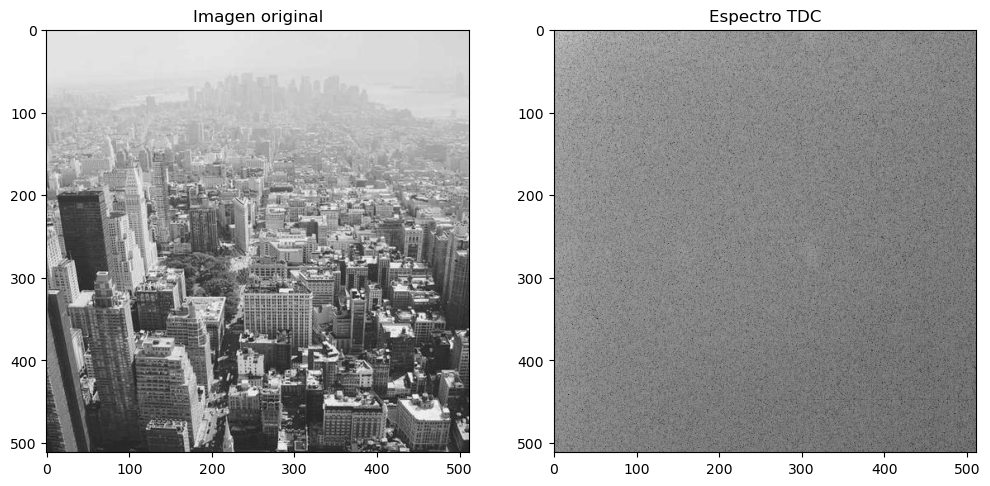

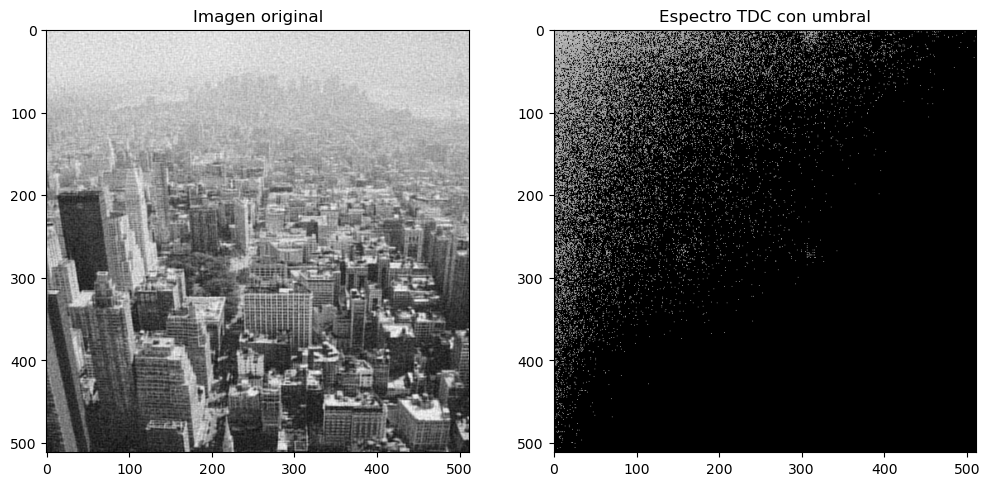

Pixeles no cero original: 	 262144
Pixeles no cero compresion TDC	:  25569
Porcentaje de compresion:  10.252415033830028


In [19]:
tdcImg = TDC_threshold(gray,0.000125)

In [23]:
def Fourier_threshold(gray, T=1e-5):
    Nr, Nc = gray.shape
    fftImg = fft.fft2(gray) / (float)(Nr * Nc)
    im_fft2 = fftImg*(abs(fftImg) >= T)
    imgCompressed = fft.ifft2(im_fft2).real
    fftImgC = fft.fft2(imgCompressed)

    mostrarimg(gray, "Imagen original",np.log10(fftImg + 1e-9).real , "Espectro de frecuencias")
    mostrarimg(imgCompressed, "Imagen con compresión", np.log10(fftImgC + 1e-9).real, "Espectro de frecuencias")

    pixOrigi = np.count_nonzero(fftImg)
    pixCompress = np.count_nonzero(im_fft2)

    print("Pixeles no zero original: \t", pixOrigi)
    print("Pixeles no zero compresion TDC\t: ", pixCompress)
    print("Porcentaje de compresion: ", (pixOrigi)/pixCompress)




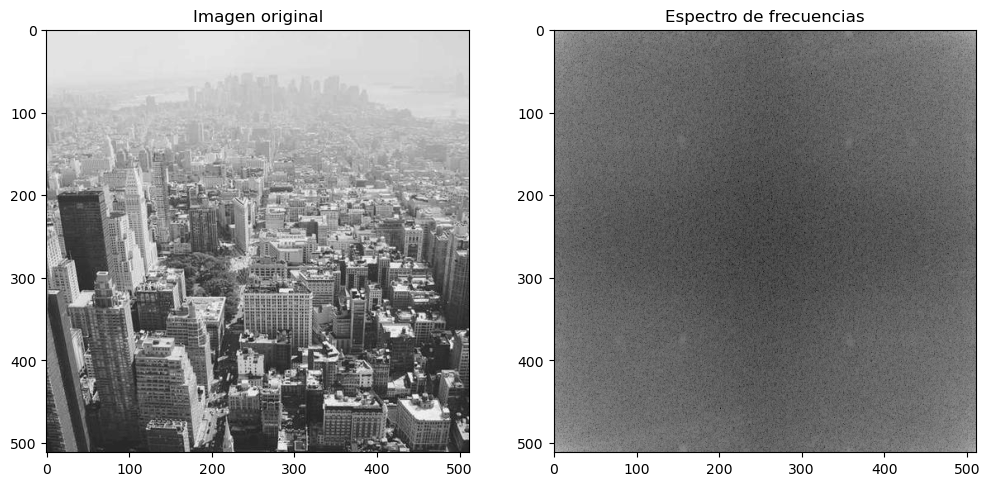

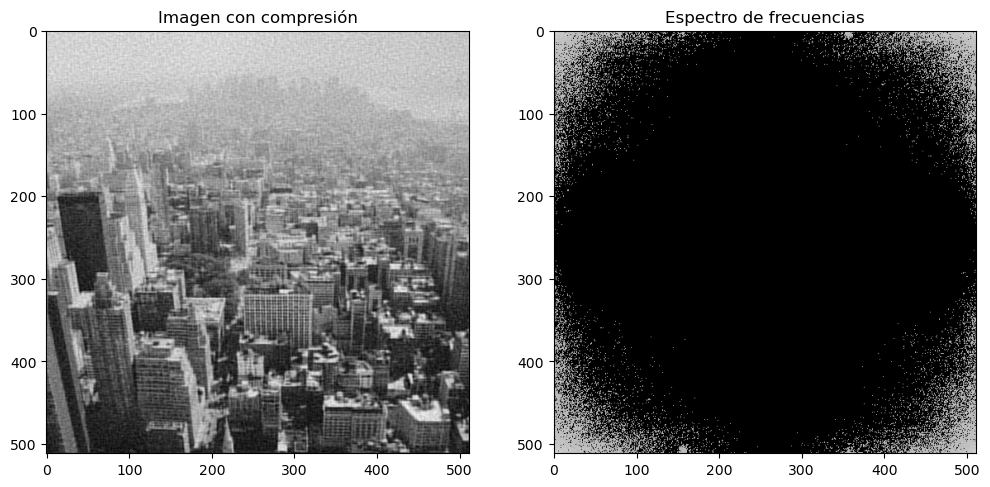

Pixeles no zero original: 	 262144
Pixeles no zero compresion TDC	:  24680
Porcentaje de compresion:  10.621717990275526


In [33]:
Fourier_threshold(gray, .068)

In [35]:
from ipywidgets import interact, fixed

interact(TDC_threshold,gray=fixed(gray),T=(0,1,.01))


interactive(children=(FloatSlider(value=1e-05, description='T', max=1.0, step=0.01), Output()), _dom_classes=(…

<function __main__.TDC_threshold(gray, T=1e-05)>